# ATSC 405 Day 29 Assignment
## Bryan Jansens

--------

## 1. Confirm that the mean diameter of the Marshall-Palmer distribution is $1/\Lambda$.

The Marshall-Palmer distribution is given by eq. (4.31) in Thompkins,$\\[5mm]$

$$N(D)=N_0e^{-\Lambda D},\\[5mm]$$

where "$N(D) \ dD$ is the number of drops per unit volume with diameters between $D$ and $D+dD$," $N_0=0.08 \ \mathrm{cm}^{-4}$ is independent of the rainfall rate, and $\Lambda$ is a slope factor depending on the rainfall rate $R$ according to eq. (4.32) in Thompkins,$\\[5mm]$

$$-\Lambda(R)=41R^{-0.21}.\\[5mm]$$

The mean diameter of the Marshall-Palmer distribution can be obtained using the relationship$\\[5mm]$

$$\overline{x}=\int_0^\infty xp(x) \ dx,$$

where in this case $x=D$ and $p(x)$ is the Marshall-Palmer distribution. The integral to be solved is this integral, divided by the integral of the distribution to normalize:$\\[5mm]$

$$\overline{D}=\frac{N_0\int_0^\infty D \ e^{-\Lambda D} \ dD}{N_0\int_0^\infty e^{-\Lambda D} \ dD}.\\[5mm]$$

I can look this up in an integral table:$\\[5mm]$

$$\int e^{cx} \ dx=\frac{1}{c}e^{cx}, \ \ \ \ \ \ \ \ \int xe^{cx} \ dx=e^{cx}\left(\frac{cx-1}{c^2}\right).\\[5mm]$$

So with $c=-\Lambda$ I have$\\[5mm]$

$$\begin{aligned}
\overline{D}&=\frac{\left[e^{-\Lambda D}\left(\frac{-\Lambda D-1}{\Lambda^2}\right)\right]_{D=0}^{D=\infty}}{\left[-\frac{1}{\Lambda}e^{-\Lambda D}\right]_{D=0}^{D=\infty}}\\[2mm]
&=\frac{\left[0-\left(\frac{-1}{\Lambda^2}\right)\right]}{\left[0-\left(-\frac{1}{\Lambda}\right)\right]}\\[2mm]
&=\frac{\frac{1}{\Lambda^2}}{\frac{1}{\Lambda}}\\[2mm]
&=\boxed{\frac{1}{\Lambda}.}
\end{aligned}\\[5mm]$$

## 2. Calculate the precipitation flux (in mm/hr) using the Marshall-Palmer size distribution and the fall speed of Villermaux and Bossa (2009): $w=-\sqrt{\rho_l/\rho_{air}gD}$ where $D$ is the drop diameter and $\rho_l$, $\rho_{air}$ are the liquid and air densities. Show that you get about $R=15$ mm/hr back if you put $R=15$ mm/hr into the size distribution.

First, here is the code from marshallpalmer.py.

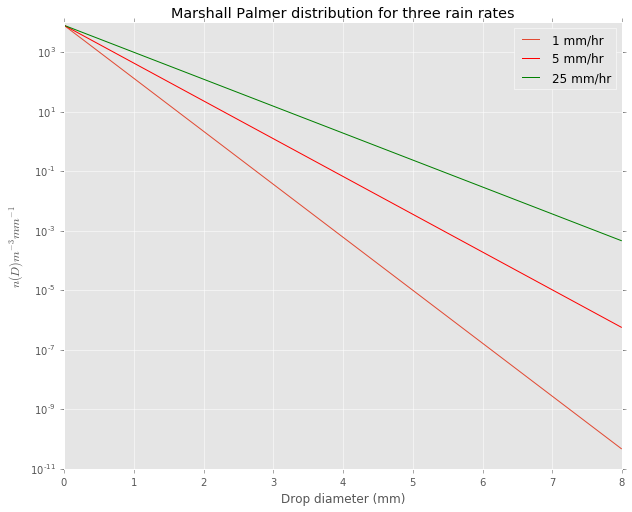

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
D=np.arange(0,8,0.01)
Dmm=D
Dcm=D*0.1
N0=0.08*1.e6*1.e-1 #m**{-3} mm^{-1}
R=1.
theLambda=41*R**(-0.21)
curve1=N0*np.exp(-theLambda*Dcm)
R=5.
theLambda=41*R**(-0.21)
curve2=N0*np.exp(-theLambda*Dcm)
R=25.
theLambda=41*R**(-0.21)
curve3=N0*np.exp(-theLambda*Dcm)
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.semilogy(D,curve1,label='1 mm/hr')
ax.semilogy(D,curve2,'r-',label='5 mm/hr')
ax.semilogy(D,curve3,'g-',label='25 mm/hr')
ax.set_xlabel('Drop diameter (mm)')
ax.set_ylabel('$n(D) m^{-3} mm^{-1}$')
ax.set_title('Marshall Palmer distribution for three rain rates')
out = ax.legend(loc='best')

I assume the equation I should be using here is eq. (4) from Villermaux and Bossa, namely (converted into our notation) $\\[5mm]$

$$R=\int N(D) \ \frac{\pi D^3}{6} \ w \ dD.\\[5mm]$$

Assuming that I assume correctly, the integral to be solved is$\\[5mm]$

$$R=\frac{N_0\pi}{6}\int_0^\infty e^{-\Lambda D} \ D^3 \ \sqrt{-\frac{\rho_l}{\rho_{air}}gD} \ dD.\\[5mm]$$

This is one hell of a complicated integral. So I will have to calculate it numerically. I'll put $R=15$ mm/hr into the size distribution to calculate $\Lambda$.

Note: I think I must have a $D^4$ term inside the integral, not $D^3$. This is the only way I can end up with the appropriate units in the end.

In [6]:
#Constants

g = 9.81                    #m s^-2
gcm = g*100                 #cm s^-2
rhol = 1000.                #kg m^-3
rhoair = 1.                 #kg m^-3
R = 15.                     #mm hr^-1
N_0 = 0.08                  #cm^-4

#The first term

theLambda = 41*R**(-0.21)
term1 = np.exp(-theLambda*Dcm)

#The third term. Note that the units of the densities cancel so I don't think I need to convert them from m to cm

term3 = ((rhol/rhoair)*gcm*Dcm)**0.5

#Set up the integral

integrand = term1*(Dcm**3)*term3
integrand_centers = (integrand[1:] + integrand[:-1])/2.

#Calculate the integral

integral = np.sum(integrand_centers*np.diff(Dcm))
rain_rate_cmpersec = ((N_0*np.pi)/6)*integral
rain_rate_mmpersec = rain_rate_cmpersec*10
rain_rate_mmperhour = rain_rate_mmpersec*60*60
print('The rainfall rate is {:.3f} mm/hr.'.format(rain_rate_mmperhour))

The rainfall rate is 12.409 mm/hr.
